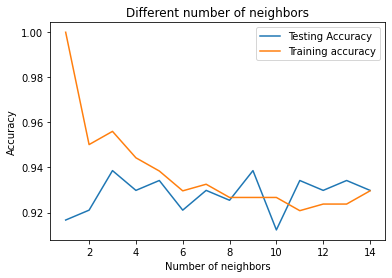

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


data_file_name = "/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_Classification/Data/Cancer_data.csv"
data_file = pd.read_csv(data_file_name)


#data_file.shape

# we need to seperate classes from features 

y = data_file['Class'].values
X = data_file.drop('Class',axis=1).values
'''
for j in range(len(y)):
  if y[j] == 'M':
    y[j] = '0'
  else:
    y[j] = '1'
'''
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)


num_neighbors = np.arange(1,15)
tr_accuracy =np.empty(len(num_neighbors))
te_accuracy = np.empty(len(num_neighbors))

for i,k in enumerate(num_neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)

  tr_accuracy[i] = knn.score(X_train, y_train)
  te_accuracy[i] = knn.score(X_test, y_test)

plt.title('Different number of neighbors')
plt.plot(num_neighbors, te_accuracy, label='Testing Accuracy')
plt.plot(num_neighbors, tr_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# When K = 9, it has the best performance 

In [3]:
from sklearn.metrics import confusion_matrix

#Use the best result we get from above, which is 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

print("Accuracy:", knn.score(X_test,y_test))



y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)



Accuracy: 0.9385964912280702


array([[142,   1],
       [ 13,  72]])

In [4]:
from sklearn.model_selection import GridSearchCV


# Use the gridsearch cross validation to find the ultimate best k
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,75)}
knn_cv= GridSearchCV(knn,param_grid,cv=5)


knn_cv.fit(X,y)
print(knn_cv.best_score_)
print(knn_cv.best_params_)



0.935010091600683
{'n_neighbors': 14}


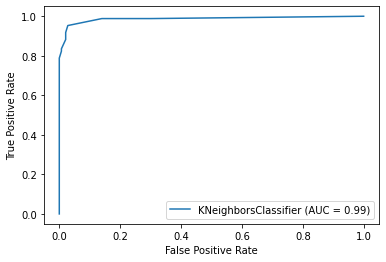

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)



y_pred_proba = knn.predict_proba(X_test)[:,1]
'''
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=14) ROC curve')
plt.show()
'''
plot_roc_curve(knn,X_test,y_test)
